# 3D deformation of a sphere

In [1]:
from advectionplot import *

# Error definitions

## Phase indicator (marker) - initial error

#### Convergence rate for $\frac{|V(t_0) - V_e|}{V_e}$,  $V(t_0) := \sum_{c \in C} \alpha_c |\Omega_c|$,  $V_e$ is the exact volume. 

**Note the exact volume is not read from system/fvSolution, sphere of $R=0.15$ is used here and needs to match system/fvSolution.**

## Advection errors

### Ev: volume conservation error 

### $$E_v(t)  = \frac{\left|\sum_{c \in C}\alpha_c(t)|\Omega_c| - \sum_{c \in C} \alpha_c(t_0)|\Omega_c|\right|}{\left|\sum_{c \in C} \alpha_c(t_0)|\Omega_c|\right|}$$

###  Eg: L1 Geomeric error 

### $$E_g = \sum_{c \in C} |\Omega_c||\alpha_c(t_e) - \alpha_c(t_0)|$$

### Eb: numerical boundedness 

**The method is unconditionally numerically stable (bounded).**

# Test case setup

In [2]:
R = 0.15 # Radius
V_e = 4*R**3 * pi / 3. # Exact volume
study_pattern="3Ddeformation_CN1_linear_00"

# Equidistant mesh

## Phase indicator (marker) - initial error

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


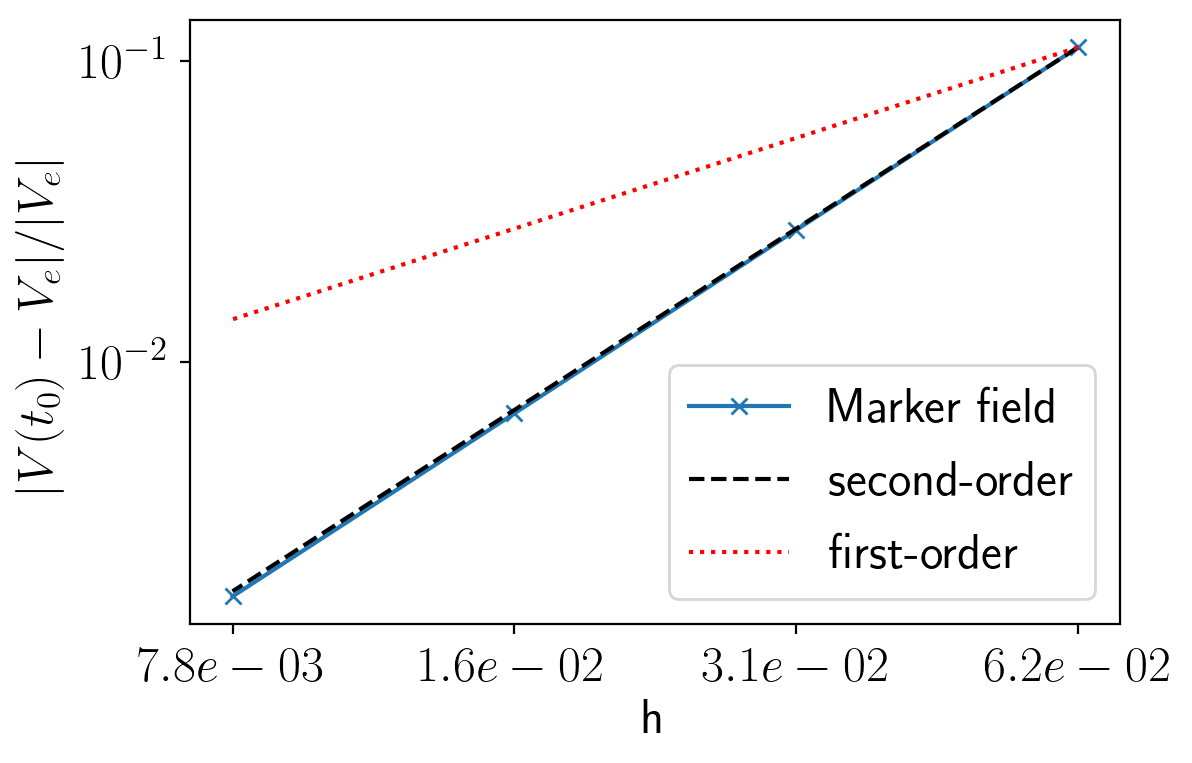

In [3]:
plot_marker_error(study_pattern, exact_volume=V_e)

## Advection errors

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


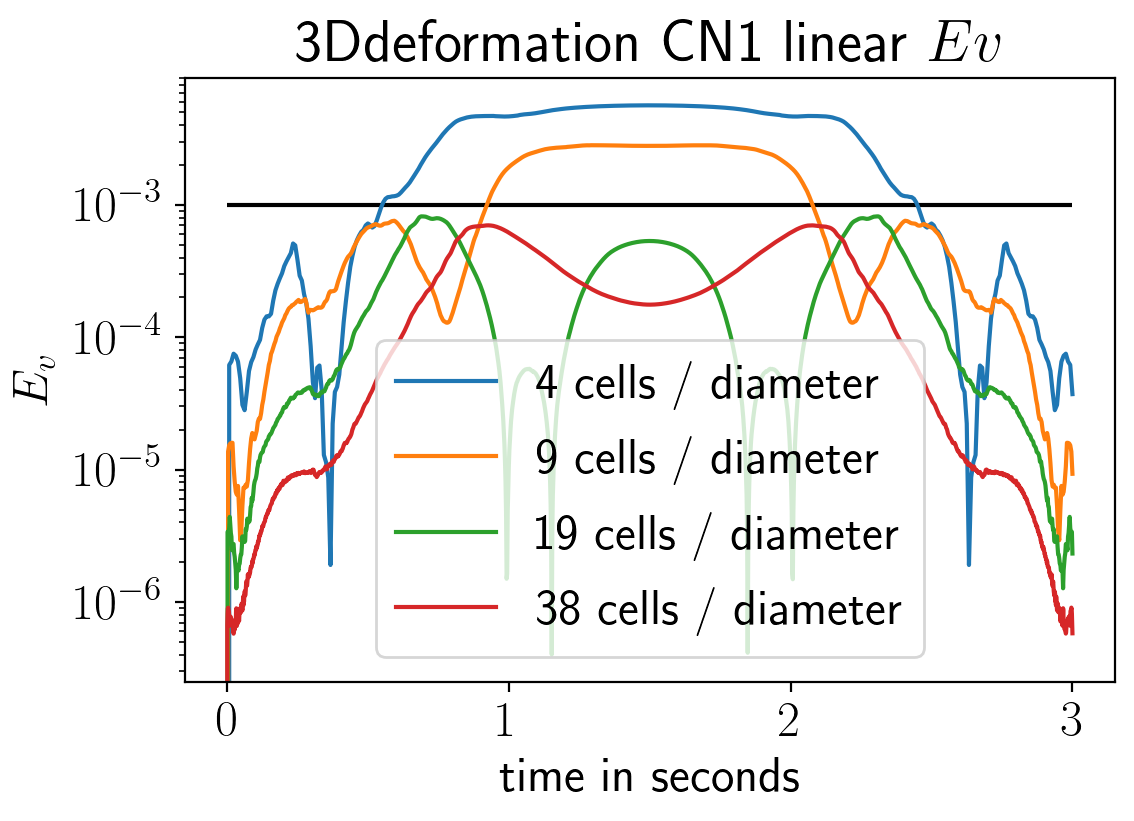

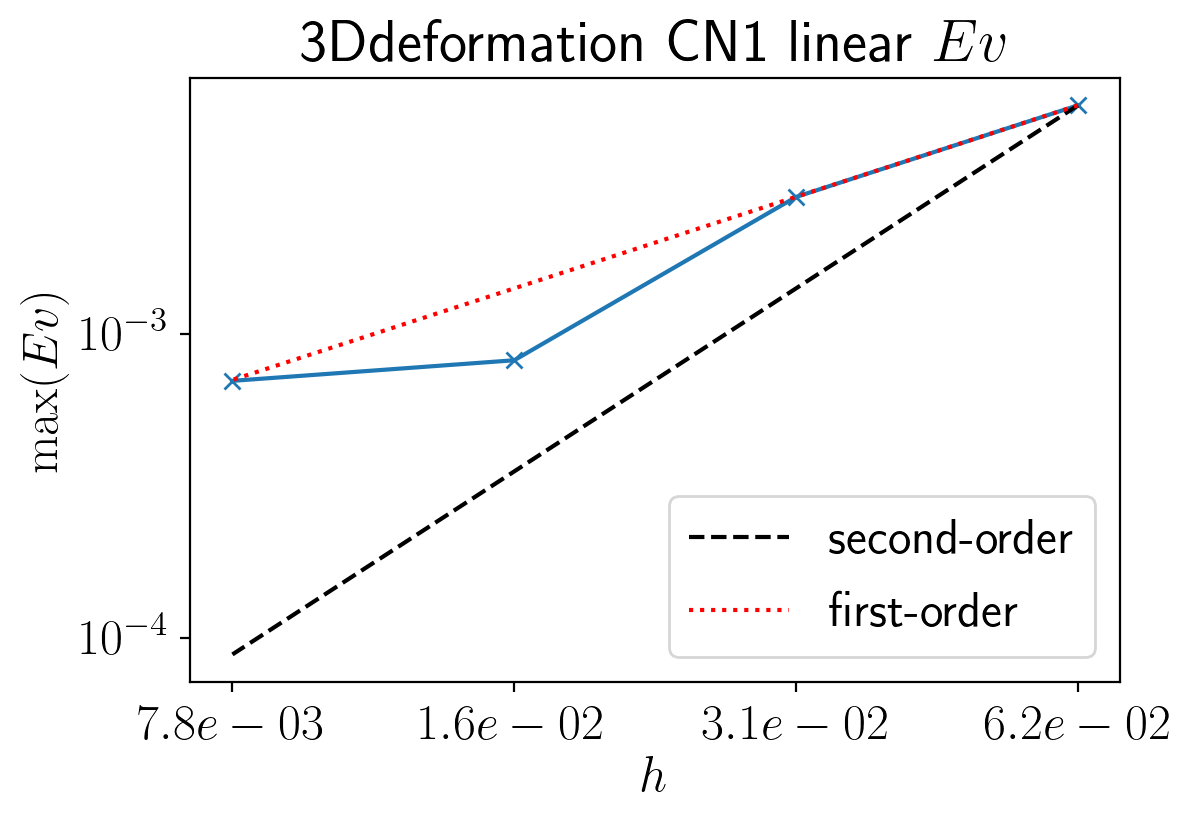

Convergence order = 1.983143 


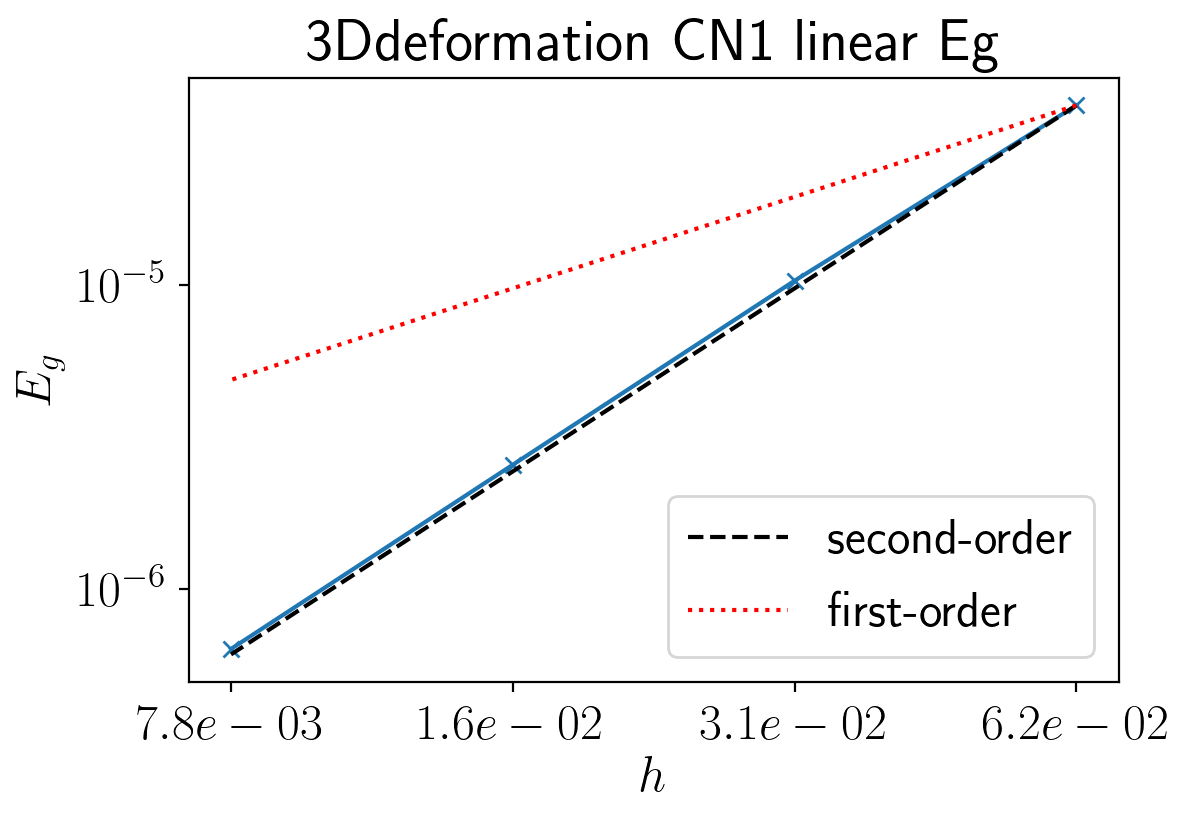

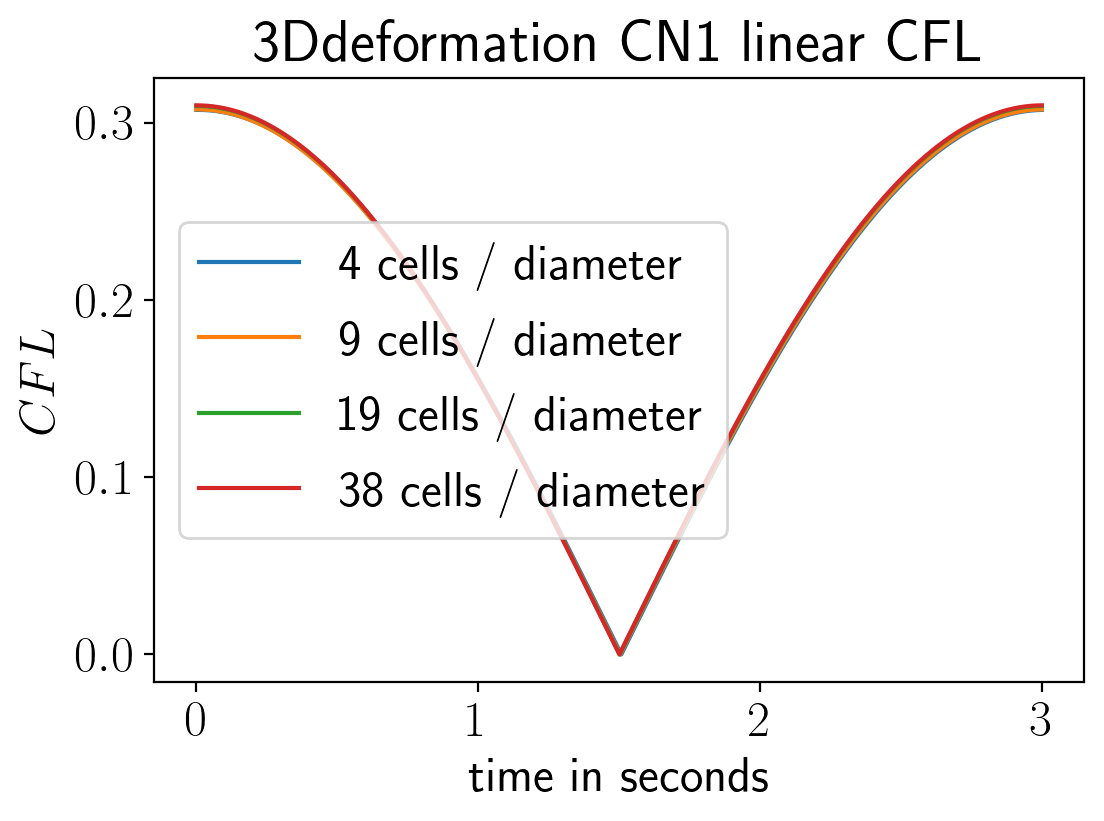

In [4]:
plot_advection_errors(study_pattern, radius=R)